In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
# the loaded PILImage images range [0, 1],  transform them to tensors of normalized range[-1, 1]
# Preprocess data and create the data loader
transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


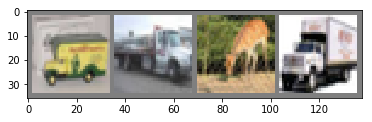

truck truck  deer truck


In [5]:
# visualize the data
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
## define a convolutional neural network:

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        ## make sure the dimensions are correct:
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
    
net = Net()    
    

In [9]:
# Define the loss function and optimizer

import torch.optim as optim


criterion  =  nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
## Train the network:

for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
    
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.205
[1,  4000] loss: 1.863
[1,  6000] loss: 1.697
[1,  8000] loss: 1.581
[1, 10000] loss: 1.525
[1, 12000] loss: 1.469
[2,  2000] loss: 1.396
[2,  4000] loss: 1.370
[2,  6000] loss: 1.339
[2,  8000] loss: 1.318
[2, 10000] loss: 1.295
[2, 12000] loss: 1.292
Finished Training


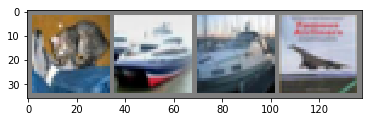

GroundTruth:    cat  ship  ship plane


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
outputs = net(images)
outputs

tensor([[-0.0341, -1.8225,  1.5671,  1.5816,  0.7781,  0.8491,  0.2785,
         -0.3882, -0.4902, -1.6497],
        [ 5.1986,  4.6531,  0.3356, -2.9528, -3.1059, -4.8652, -2.8835,
         -4.6932,  8.2787,  1.2603],
        [ 2.4553,  2.4901, -0.0461, -1.6371, -0.8713, -2.3291, -1.9234,
         -1.1803,  2.3411,  0.9065],
        [ 3.1678, -0.2598,  1.5838, -0.9119,  0.5409, -2.0425, -2.0215,
         -1.8085,  3.6506, -0.7487]])

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car  ship


In [14]:
predicted

tensor([ 3,  8,  1,  8])

In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()